## Regularized Linear Regression and Bias v.s. Variance

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
import scipy.io as from_octave # used to implement mat file type
from sklearn.preprocessing import OneHotEncoder 
import ex5_func as fn
import random as rd

# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## 1 Regularized Linear Regression

In the  first half of the exercise, regularized linear regression is implemented to predict the amount of water flowing out of a dam using the change of water level in a reservoir.  In the next half, some diagnostics of debugging learning algorithms will be employed and the efects of bias v.s. variance will be examined.

## Visualizing the dataset

In [2]:
# Loading Data
directory = os.getcwd() + '/ex5data1.mat'
data = from_octave.loadmat(directory)
print data.keys()
# assign variables
X = np.array(data['X'])
X_val = np.array(data['Xval'])
X_test = np.array(data['Xtest'])
y = np.array(data['y'])
y_val = np.array(data['yval'])
y_test = np.array(data['ytest'])

X.shape, y.shape, X_val.shape, y_val.shape , X_test.shape, y_test.shape

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


((12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1))

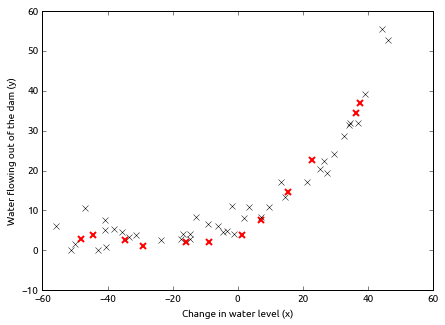

In [3]:
# red crosses represents train set
# black crosses represents test and cval sets
plt.figure(figsize=(7,5))
plt.plot(X,y,'rx',mew=2)
plt.plot(X_val,y_val,'kx',mew=.5)
plt.plot(X_test,y_test,'kx',mew=.5)
plt.xlabel("Change in water level (x)")
plt.ylabel('Water flowing out of the dam (y)')

## Regularized Linear Regression Cost & Gradient

In [4]:
reload(fn)

# initialize theta and lamda
theta = np.ones(2)
lambda_ = 1.

# add bias units to X
Xb = np.insert(X,0,1,axis=1)

cost ,grad = fn.linearRegCostFunction(theta, Xb, y, lambda_)

print 'Cost at theta = [1 ; 1]: {} '.format(cost)
print 'this value should be about 303.993192'
print '\nGradient at theta = [1 ; 1]: {} '.format(grad.T) 
print '(this value should be about [-15.303016; 598.250744])\n'

Cost at theta = [1 ; 1]: [[ 303.99319222]] 
this value should be about 303.993192

Gradient at theta = [1 ; 1]: [[ -15.30301567  598.25074417]] 
(this value should be about [-15.303016; 598.250744])



## Train Linear Regression

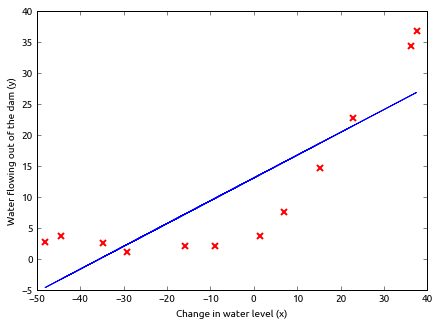

In [5]:
reload(fn)

theta = fn.trainLinearReg(Xb, y, lambda_)

plt.figure(figsize=(7,5))
plt.plot(X,y,'rx',mew=2)
plt.plot(X, Xb.dot(theta),'b')
plt.xlabel("Change in water level (x)")
plt.ylabel('Water flowing out of the dam (y)')

## 2 Bias-variance

## Learning Curve for Linear Regression

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data. 

In  this  part  of  the  exercise, training  and  test  errors  are fit on a learning curve to diagnose bias-variance problems.

## Learning curves

In [6]:
# add bias terms to X_val
Xb_val = np.insert(X_val, 0, 1, axis=1)

Training Examples  Train Error  Cross Validation Error

	0	 	0.0 		205.12
	1	 	0.0 		110.3
	2	 	3.29 		45.01
	3	 	2.84 		48.37
	4	 	13.15 		35.87
	5	 	19.44 		33.83
	6	 	20.1 		31.97
	7	 	18.17 		30.86
	8	 	22.61 		31.14
	9	 	23.26 		28.94
	10	 	24.32 		29.55
	11	 	22.37 		29.43


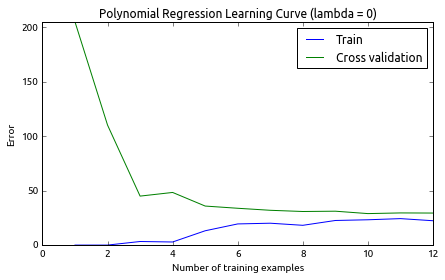

In [7]:
reload(fn)

lambda_ = 0
fn.learningCurve(Xb, y, Xb_val, y_val, lambda_)

## Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in under fitting (high bias). In this part of the exercise, this problem is addressed by adding more features.

## Feature Mapping for Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures

p_degree = 8
poly =PolynomialFeatures(degree=p_degree,interaction_only=False,include_bias=True)

# used dataframes since it looks nice
Xp = pd.DataFrame(poly.fit_transform(X))

# print some information to check 
print poly.powers_.T
Xp.head()
# notice that X has already bias terms

[[0 1 2 3 4 5 6 7 8]]


,0,1,2,3,4,5,6,7,8
0,1.0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06,1.638324e+07,-2.610958e+08,4.161020e+09
1,1.0,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07,6.139000e+08,-1.789701e+10,5.217513e+11
2,1.0,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07,2.246462e+09,8.129843e+10,2.942154e+12
3,1.0,37.492187,1405.664111,52701.422173,1.975892e+06,7.408050e+07,2.777440e+09,1.041323e+11,3.904148e+12
4,1.0,-48.058829,2309.651088,-110999.127750,5.334488e+06,-2.563693e+08,1.232081e+10,-5.921235e+11,2.845676e+13


In [9]:
# add polynomial features to test and cval datasets
Xp_val = pd.DataFrame(poly.fit_transform(X_val))
Xp_test = pd.DataFrame(poly.fit_transform(X_test))

# covert dataframes to arrays
Xp = Xp.values
Xp_val = Xp_val.values
Xp_test = Xp_test.values

# check the shapes of data
Xp.shape, Xp_val.shape, Xp_test.shape

((12, 9), (21, 9), (21, 9))

In [10]:
reload(fn)

Xp_norm, mu, sigma = fn.featureNormalize(Xp)

# Map Xp_test_norm, Xp_val_norm and normalize (using mu and sigma from the train set)
Xp_val_norm = fn.featureNormalize(Xp_val, mu, sigma)
Xp_test_norm = fn.featureNormalize(Xp_test, mu, sigma)

## Learning Curve for Polynomial Regression

#### 1 - High Variance

Training Examples  Train Error  Cross Validation Error

	0	 	0.0 		160.72
	1	 	0.0 		160.12
	2	 	0.0 		59.07
	3	 	0.0 		78.0
	4	 	0.0 		6.45
	5	 	0.0 		10.83
	6	 	0.0 		27.93
	7	 	0.0 		20.23
	8	 	0.0 		31.65
	9	 	0.02 		58.55
	10	 	0.04 		27.38
	11	 	0.03 		37.06


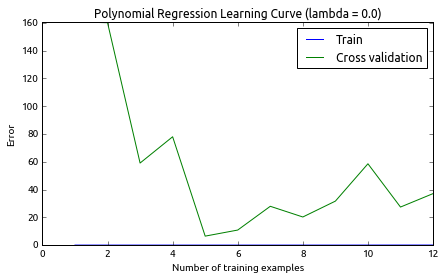

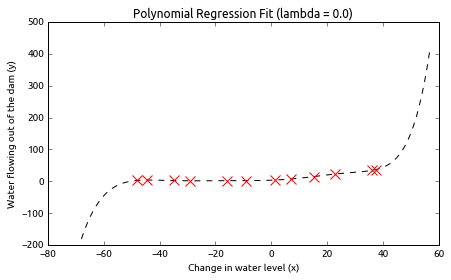

In [11]:
reload(fn)

lambda_ = 0.

theta = fn.trainLinearReg(Xp_norm, y,lambda_)

fn.learningCurve(Xp_norm, y, Xp_val_norm, y_val, lambda_)

fn.plotFit( X, y, lambda_, mu, sigma, theta, p_degree )

The polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error.  However, the polynomial fit is very complex and even drops off at the extremes.  This is an indicator that the polynomial regression model is over fitting the training ata and will not generalize well.

#### 2 - High Bias

Training Examples  Train Error  Cross Validation Error

	0	 	0.0 		138.85
	1	 	0.11 		144.13
	2	 	106.96 		70.86
	3	 	121.74 		78.37
	4	 	102.95 		63.85
	5	 	97.17 		59.53
	6	 	83.33 		59.59
	7	 	76.49 		58.7
	8	 	71.3 		59.56
	9	 	64.35 		59.73
	10	 	59.0 		60.41
	11	 	57.98 		57.84


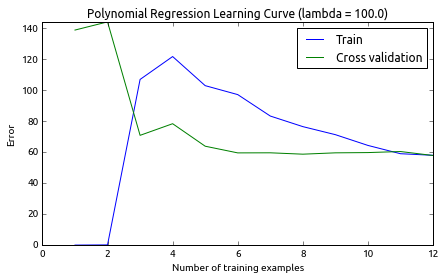

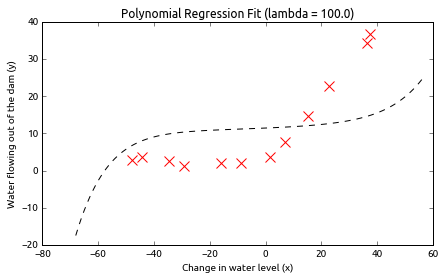

In [12]:
reload(fn)

lambda_ = 100.

theta = fn.trainLinearReg(Xp_norm, y,lambda_)

fn.learningCurve(Xp_norm, y, Xp_val_norm, y_val, lambda_)

fn.plotFit( X, y, lambda_, mu, sigma, theta, p_degree )

The polynomial  fit not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

#### 3 - No Bias & Variance

Training Examples  Train Error  Cross Validation Error

	0	 	0.0 		138.85
	1	 	0.05 		143.52
	2	 	2.91 		5.53
	3	 	1.5 		6.61
	4	 	1.2 		6.63
	5	 	0.92 		8.29
	6	 	1.54 		5.74
	7	 	1.42 		5.52
	8	 	1.55 		6.24
	9	 	1.44 		5.98
	10	 	1.31 		6.04
	11	 	2.08 		4.26


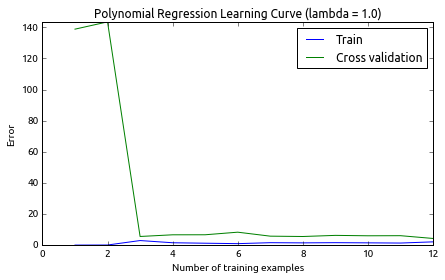

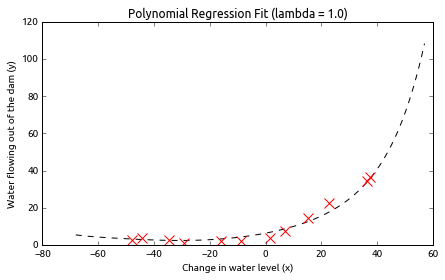

In [13]:
reload(fn)

lambda_ = 1.
theta = fn.trainLinearReg(Xp_norm, y,lambda_)

fn.learningCurve(Xp_norm, y, Xp_val_norm, y_val, lambda_)

fn.plotFit( X, y, lambda_, mu, sigma, theta, p_degree )

For lambda = 1, the polynomial fit the data trend well and the learning curve showing that both the cross validation and training error converge to a relatively low value.  This shows the lambda = 1 regularized polynomial regression model does not have the high bias or high-variance problems.  In effect, it achieves a good trade-off between bias and variance

## Validation for Selecting Lambda 

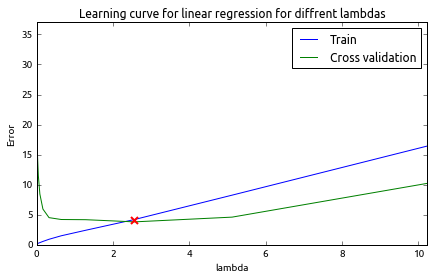

In [14]:
reload(fn)

bestlambda_ = fn.validationCurve(Xp_norm, y, Xp_val_norm, y_val)
# help(plt.plot)

Cross validation curve of error v.s. lambda that allows you select which lambda parameter to use. The above figure shows that the best value of lambda is around 3.  Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

## Computing test set error

In [15]:
reload(fn)

lambda_ = bestlambda_
fn.testError(Xp_norm, y, Xp_test_norm, y_test, lambda_)

array([[ 3.37415679]])

To get a better indication of the model's performance in the real world, it is important to evaluate the 'final' model on a test set that was not used in any part of training (that is, it was neither used to select the lambda parameters, nor to learn the model parameters theta) 

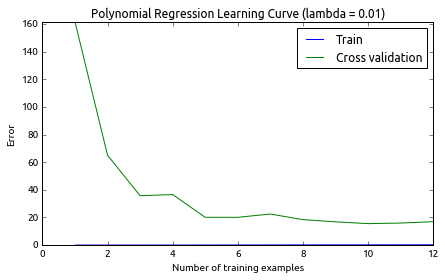

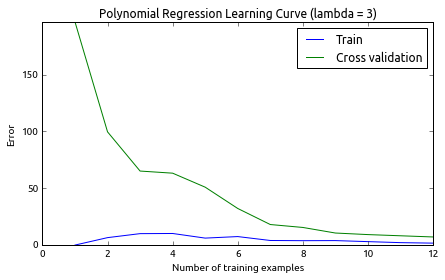

In [16]:
reload(fn)

lambda_ = 0.01
iteration = 30
fn.bootstrapLearningCurve(Xp_norm, y, Xp_val_norm, y_val, lambda_,iteration)

lambda_ = 3
fn.bootstrapLearningCurve(Xp_norm, y, Xp_val_norm, y_val, lambda_,iteration)